In [23]:
import pandas as pd
data_frame = pd.DataFrame.from_csv("data/processed_data.csv")
data_frame.head()

,LANGUAGE_APL,LANGUAGE_ASP,LANGUAGE_ApacheConf,LANGUAGE_Assembly,LANGUAGE_Batchfile,LANGUAGE_C,LANGUAGE_C++,LANGUAGE_CSS,LANGUAGE_CoffeeScript,LANGUAGE_Common Lisp,LANGUAGE_Cucumber,LANGUAGE_Cuda,LANGUAGE_Erlang,LANGUAGE_FORTRAN,LANGUAGE_FreeMarker,LANGUAGE_GCC Machine Description,LANGUAGE_GLSL,LANGUAGE_Gnuplot,LANGUAGE_Go,LANGUAGE_Groff,LANGUAGE_Groovy,LANGUAGE_HTML,LANGUAGE_Haskell,LANGUAGE_Java,LANGUAGE_JavaScript,LANGUAGE_Julia,LANGUAGE_Jupyter Notebook,LANGUAGE_Liquid,LANGUAGE_LiveScript,LANGUAGE_Logos,LANGUAGE_Lua,LANGUAGE_M4,LANGUAGE_Makefile,LANGUAGE_Matlab,LANGUAGE_Objective-C,LANGUAGE_PHP,LANGUAGE_Perl,LANGUAGE_PigLatin,LANGUAGE_PostScript,LANGUAGE_Python,LANGUAGE_R,LANGUAGE_REXX,LANGUAGE_Ruby,LANGUAGE_SQLPL,LANGUAGE_Shell,LANGUAGE_Smalltalk,LANGUAGE_Smarty,LANGUAGE_Swift,LANGUAGE_TeX,LANGUAGE_TypeScript,LANGUAGE_VimL,LANGUAGE_XSLT,LANGUAGE_Yacc,LANGUAGE_eC,branchesCount,closed_issues,closed_pull_requests,commitsCount,description,forks,hasCiConfig,hasHomepage,hasLicense,isOwnerHomepage,label,mentionableUsers,merged_pull_requests,name,open_issues,open_pull_requests,owner,projects,readme,releasesCount,repository,size,stargazers,tagsCount,watchers
0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.000000,NaN,0.0,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.000000,0.0,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0,0,0,0,WEB,0.0,0.0,hacke2.github.com,0.0,0.0,hacke2,0.0,NaN,0.0,hacke2/hacke2.github.com,0.0,0.0,0.0,0.0
1,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.526166,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.188628,NaN,0.0,0.285207,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.000000,0.0,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,1.0,0.0,2.0,379.0,这是一个使用 Jekyll 搭建的个人博客，用来快速记录工作，学习，生活的一点一滴。更多分享...,110.0,False,True,False,True,WEB,1.0,0.0,pizn.github.com,2.0,0.0,pizn,0.0,pizngithubcom a hrefhttp://wwwzhanxininfo targ...,0.0,pizn/pizn.github.com,1783.0,132.0,2.0,18.0
2,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.000952,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.996477,NaN,0.0,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.000000,0.0,NaN,0.002571,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,1.0,9.0,17.0,1441.0,ploeh blog 'source code',135.0,False,True,True,True,WEB,185.0,225.0,ploeh.github.com,4.0,1.0,ploeh,0.0,ploeh blogThis repository contains the templa...,0.0,ploeh/ploeh.github.com,12074.0,19.0,8.0,3.0
3,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.457166,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.536208,NaN,0.0,0.005245,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.000000,0.0,NaN,0.001381,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,1.0,63.0,29.0,1046.0,The Propel website and documentation.,155.0,True,True,False,True,WEB,130.0,274.0,propelorm.github.com,15.0,1.0,propelorm,0.0,The Propel WebsiteBuildStatushttps://travis-ci...,0.0,propelorm/propelorm.github.com,8907.0,104.0,0.0,9.0
4,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.027969,NaN,0.0,0.137785,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.071071,0.0,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,1.0,1.0,0.0,58.0,滚蛋吧！莆田系,43.0,False,True,False,True,WEB,2.0,1.0,putianxi.github.io,0.0,0.0,putianxi,0.0,/assets/images/screenshot/indexjpg https://p...,0.0,putianxi/putianxi.github.io,1816.0,241.0,1.0,10.0


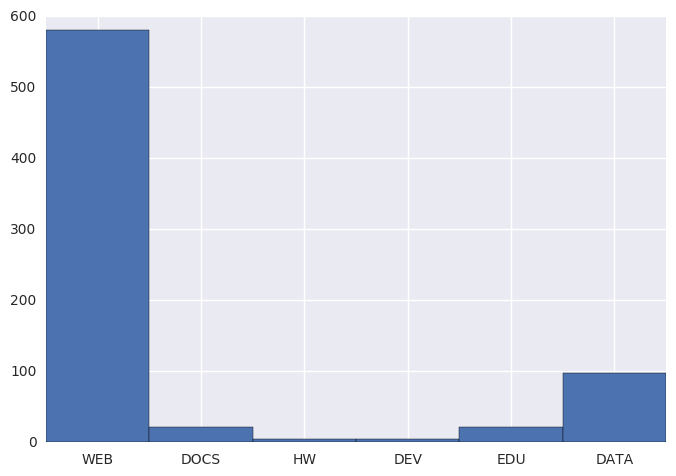

In [32]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


labels, values = zip(*Counter(data_frame['label']).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


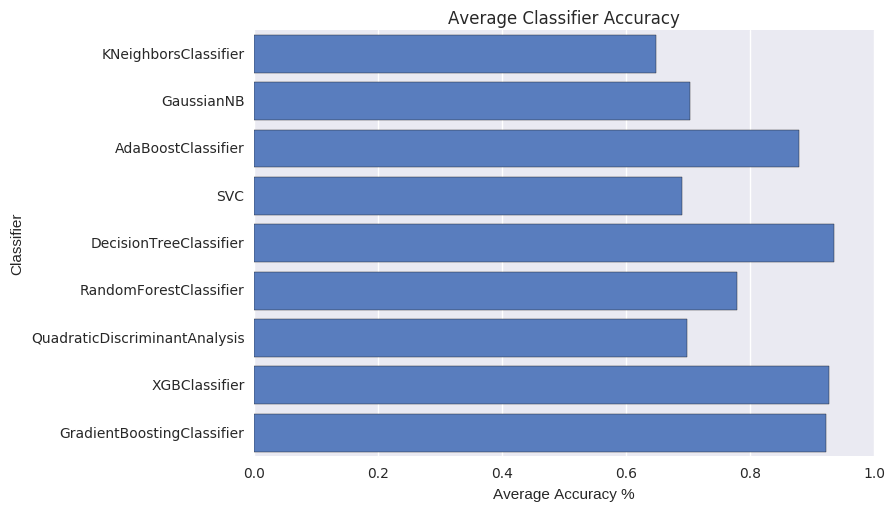

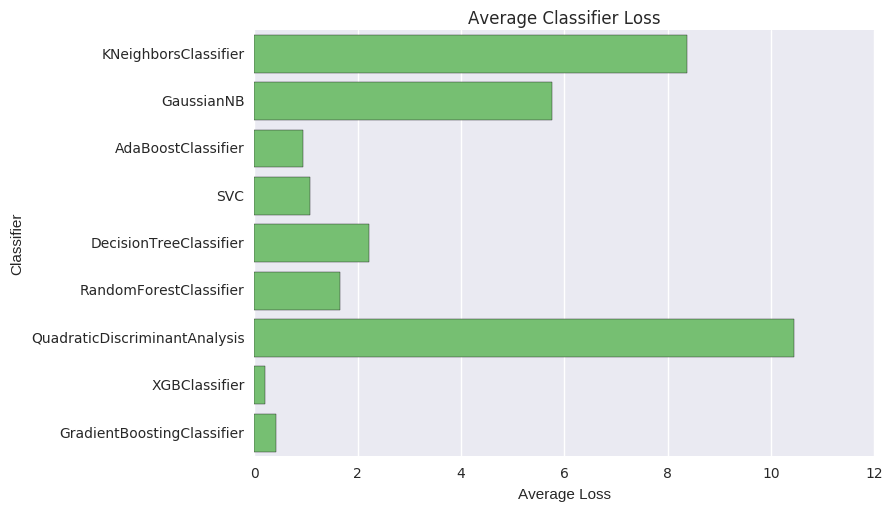

In [42]:
"""Compare 9 classifiers"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from tqdm import tqdm
sns.set_color_codes("muted")

data_frame = pd.read_csv('data/processed_data.csv')

le = LabelEncoder().fit(data_frame.label) 
labels = le.transform(data_frame.label)  
sss = StratifiedShuffleSplit(labels, 10, test_size=0.3, random_state=23)

data_frame.drop('readme', axis=1, inplace=True)
data_frame.drop('description', axis=1, inplace=True)
data_frame.drop('repository', axis=1, inplace=True)
data_frame.drop('owner', axis=1, inplace=True)
data_frame.drop('name', axis=1, inplace=True)
data_frame.drop('label', axis=1, inplace=True)
data_frame.fillna(0, inplace=True)

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    DecisionTreeClassifier(class_weight='balanced'),
    RandomForestClassifier(class_weight='balanced'),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    #LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier()]

classifier_accs = {}
classifier_loss = {}
for clf in classifiers:
    classifier_accs[clf.__class__.__name__] = 0
    classifier_loss[clf.__class__.__name__] = 0

for train_index, test_index in tqdm(sss):
    X_train, X_test = data_frame.values[train_index], data_frame.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    for clf in classifiers:
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        classifier_accs[name] += acc

        train_predictions = clf.predict_proba(X_test)
        ll = log_loss(y_test, train_predictions)
        classifier_loss[name] += ll

avg_acc = {k: v / len(sss) for k, v in classifier_accs.iteritems()}
avg_loss = {k: v / len(sss) for k, v in classifier_loss.iteritems()}
avg_df = pd.DataFrame([[name, acc, avg_loss[name]] for name, acc in avg_acc.iteritems()], columns=['Classifier', 'Avg Accuracy', 'Avg Loss'])

sns.barplot(x='Avg Accuracy', y='Classifier', data=avg_df, color="b")
plt.xlabel('Average Accuracy %')
plt.title('Average Classifier Accuracy')
plt.show()

sns.barplot(x='Avg Loss', y='Classifier', data=avg_df, color="g")
plt.xlabel('Average Loss')
plt.title('Average Classifier Loss')
plt.show()

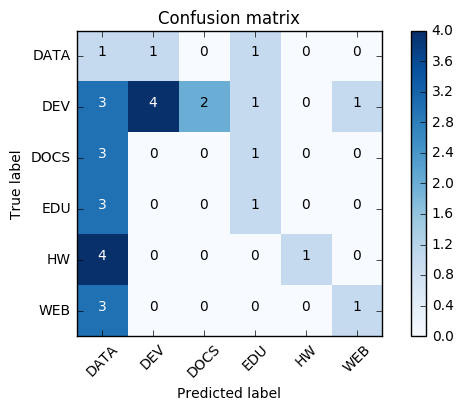

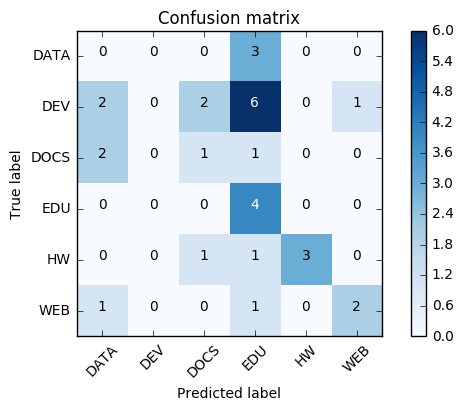

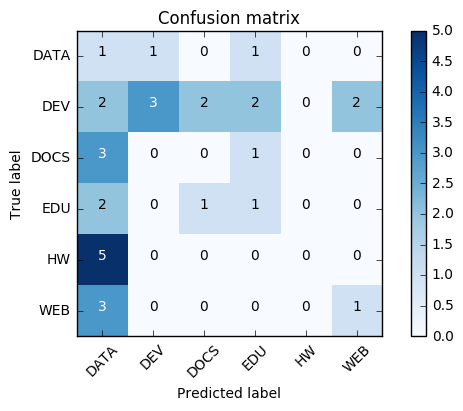

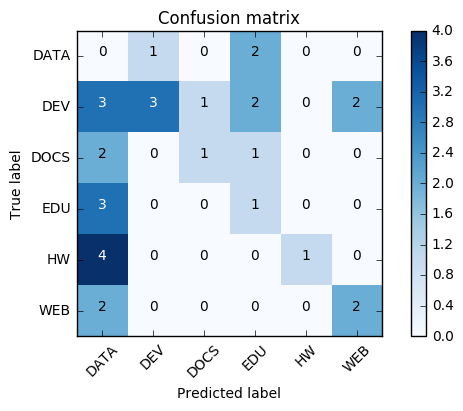

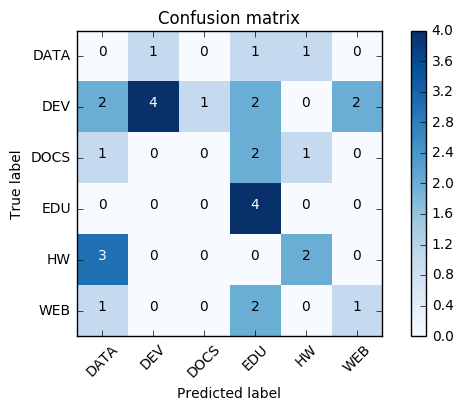

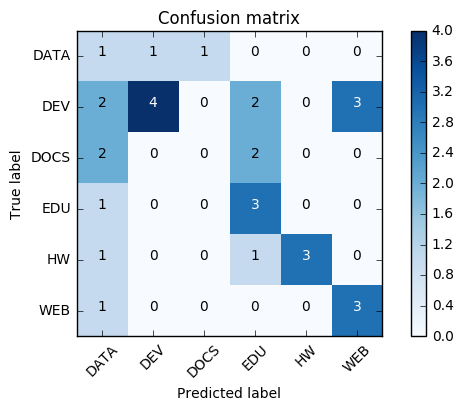

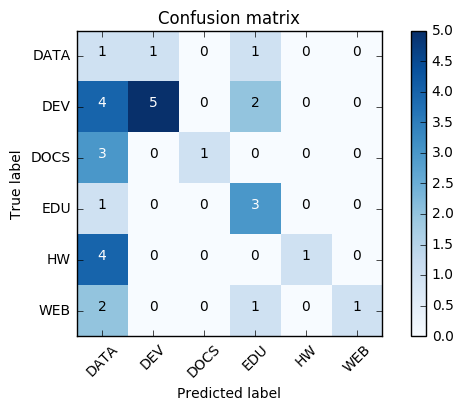

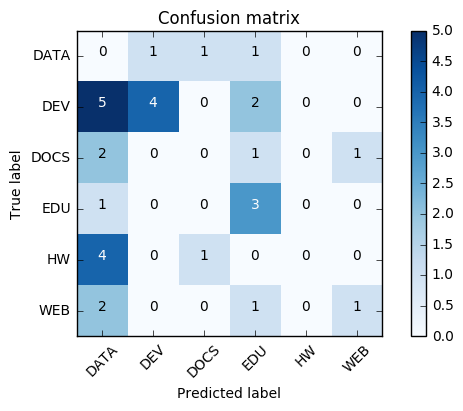

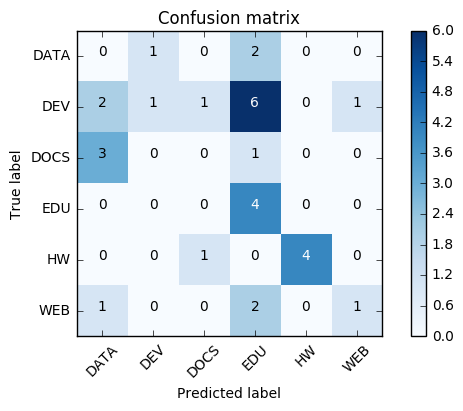

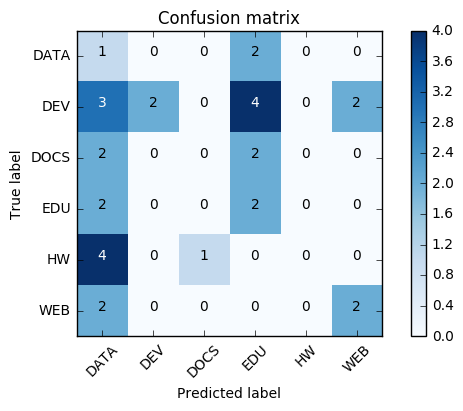

0.303225806452


In [11]:
"""Learn one classifier on the training set and evaluate it on the validation set"""

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsOneClassifier
from app.evaluation import get_accuracy_and_plot_confusion, get_training_and_validation_df

X_train, y_train, X_valid, y_valid = get_training_and_validation_df()

le = LabelEncoder().fit(y_train)
labels = le.transform(y_train)  
classes = le.classes_
acc = 0

sss = StratifiedShuffleSplit(labels, 10, test_size=0.3, random_state=23)
for train_index, test_index in sss:
    X_train_tmp, X_test_tmp = X_train[train_index], X_train[test_index]
    y_train_tmp, y_test_tmp = y_train[train_index], y_train[test_index]

    clf = XGBClassifier()
    clf.fit(X_train_tmp, y_train_tmp)
    y_pred = clf.predict(X_valid)
    acc += get_accuracy_and_plot_confusion(y_valid, y_pred, classes)
    
print acc/len(sss)